## Quantitative and visual exploratory data analysis(EDA) for a Shopping Mall

### Objective

Explore a shopping mall dataset. 

Methods used: Linear Regression and Multiple Regression. 


#### Load the data

In [1]:
import pandas as pd
mall = pd.read_excel('C:\\Users\\Diego Alves\\Desktop\\Data_sets\\Official_Mall_Customers.xlsx', sheet_name='Master_Data_Mall_Customers')
mall.head(10) # Print the first 10 lines

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [2]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual_Income           200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### The data has the following attributes: 

In [3]:
mall.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual_Income              int64
Spending Score (1-100)     int64
dtype: object

### 1 Regression

Plot the data based on Annual Income vs Age

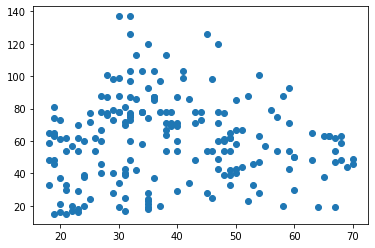

In [4]:
import matplotlib.pyplot as plt 
import numpy
%matplotlib inline
age = numpy.array(mall['Age'])
income = numpy.array(mall['Annual_Income'])
plt.scatter(age, income)

Keep it simple and just use scipy.state.linregress:

In [5]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(age, income)

R-squared value shows not a good fit. They are independent values

Which means that the "Age" will not impact on " Annual_Income "?

In [6]:
r_value ** 2 =1 # means 100%

0.00015371146368517368

Lets Plot the Linear Line results:

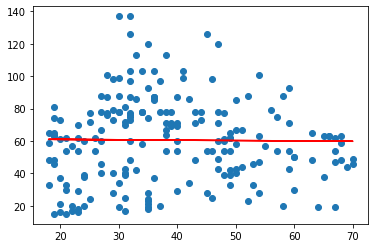

In [7]:
import matplotlib.pyplot as plt

def predict(x):
    return slope * x + intercept

fitLine = predict(age)

plt.scatter(age, income)
plt.plot(age, fitLine, c='r')
plt.show()

## Train / Test

### Objective: Prove the results. FInd out if the data will give a specific Age group that has better income. 

#### Split the data: 80% and 20%

In [9]:
x = mall['Age']
y = mall['Annual_Income']

In [10]:
from sklearn.model_selection import train_test_split
age_train, age_test, income_train, income_test= train_test_split(x,y,test_size=0.20)

In [11]:
%matplotlib inline
import numpy as np
from pylab import *

#### 80% of it will be used for "training" model, and the other 20% for testing it. This way will avoid overfitting.

### Training data

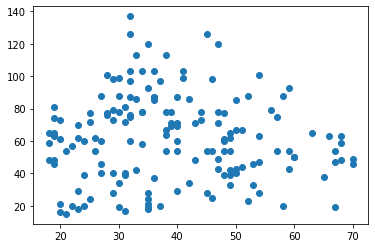

In [12]:
scatter(age_train, income_train)

### Test data

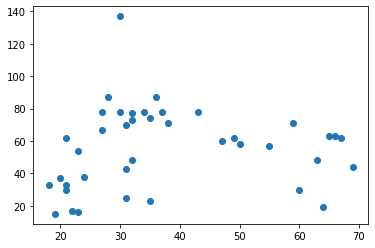

In [13]:
scatter(age_test, income_test)

### Let's plot a polynomial line against the training data:
- In statistics, polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x

In [14]:
trainx = np.array(age_train)
trainy = np.array(income_train)

p4 = np.poly1d(np.polyfit(x, y, 4))

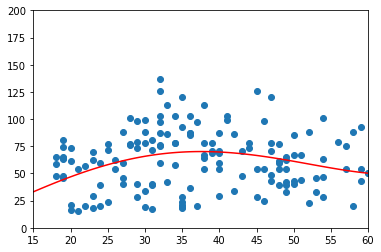

In [15]:
import matplotlib.pyplot as plt

xp = np.linspace(15, 60, 100)
axes = plt.axes()
axes.set_xlim([15,60])
axes.set_ylim([0, 200])
plt.scatter(trainx, trainy)
plt.plot(xp, p4(xp), c='r')
plt.show()

#### And against the test data:

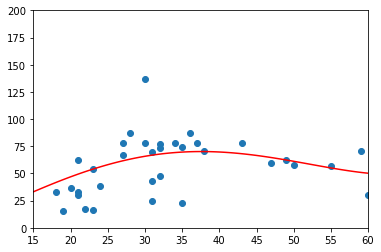

In [16]:
testx = np.array(age_test)
testy = np.array(income_test)

axes = plt.axes()
axes.set_xlim([15,60])
axes.set_ylim([0, 200])
plt.scatter(testx, testy)
plt.plot(xp, p4(xp), c='r')
plt.show()

#### The r-squared score: Test Data

In [17]:
from sklearn.metrics import r2_score

r2 = r2_score(testy, p4(testx))

print(r2)

0.24020942191466288


#### The r-squared score: training Data

In [18]:
from sklearn.metrics import r2_score

r2 = r2_score(np.array(trainy), p4(np.array(trainx)))

print(r2)

0.06449233313935909


### Conculsion:  Age has no impact on the Annual_Income

## 2 Multiple Regression

### Search for new correlations
Ex: Annual_Income vs Spending Score (1-100)

                        Spending Score (1-100)  Annual_Income
Spending Score (1-100)                                       
(0, 15]                               9.000000      59.500000
(15, 30]                             22.388889      81.277778
(30, 45]                             39.176471      54.382353
(45, 60]                             52.465517      54.379310
(60, 75]                             70.750000      62.041667


<AxesSubplot:xlabel='Spending Score (1-100)'>

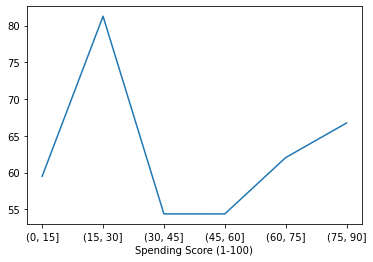

In [19]:
%matplotlib inline
import numpy as np
df=mall[['Spending Score (1-100)', 'Annual_Income']]
bins =  np.arange(0,99,15)
groups = df.groupby(pd.cut(df['Spending Score (1-100)'],bins)).mean()
print(groups.head())
groups['Annual_Income'].plot.line()

### So what is impacting on Spending Score?

### Maybe Gender? Convert the categorical data(Gender) to numerical data

In [20]:
mall['Gender'] = pd.factorize(mall.Gender)[0] # this convert categorical data to numerical data
mall.head

<bound method NDFrame.head of      CustomerID  Gender  Age  Annual_Income  Spending Score (1-100)
0             1       0   19             15                      39
1             2       0   21             15                      81
2             3       1   20             16                       6
3             4       1   23             16                      77
4             5       1   31             17                      40
..          ...     ...  ...            ...                     ...
195         196       1   35            120                      79
196         197       1   45            126                      28
197         198       0   32            126                      74
198         199       0   32            137                      18
199         200       0   30            137                      83

[200 rows x 5 columns]>

### Male: 0 Female: 1

### Split up this matrix into the feature vectors of interest, and the value to predict.

In [22]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = mall[['Age', 'Annual_Income', 'Gender']]
y = mall['Spending Score (1-100)']

X[['Age', 'Annual_Income', 'Gender']] = scale.fit_transform(X[['Age', 'Annual_Income', 'Gender']].values) # scales the data for a normal distribution

# Add a constant column to the model to interpret a Y-intercept
X = sm.add_constant(X)

print (X)

customers = sm.OLS(y, X).fit() # this passes the lable(y) data and feature data(X), then correlate both together

customers.summary()

     const       Age  Annual_Income    Gender
0      1.0 -1.424569      -1.738999 -1.128152
1      1.0 -1.281035      -1.738999 -1.128152
2      1.0 -1.352802      -1.700830  0.886405
3      1.0 -1.137502      -1.700830  0.886405
4      1.0 -0.563369      -1.662660  0.886405
..     ...       ...            ...       ...
195    1.0 -0.276302       2.268791  0.886405
196    1.0  0.441365       2.497807  0.886405
197    1.0 -0.491602       2.497807 -1.128152
198    1.0 -0.491602       2.917671 -1.128152
199    1.0 -0.635135       2.917671 -1.128152

[200 rows x 4 columns]


<ipython-input-22-2815a6123120>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Age', 'Annual_Income', 'Gender']] = scale.fit_transform(X[['Age', 'Annual_Income', 'Gender']].values) # scales the data for a normal distribution
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Spending Score (1-100)   R-squared:                       0.109
Model:                                OLS   Adj. R-squared:                  0.095
Method:                     Least Squares   F-statistic:                     7.960
Date:                    Thu, 29 Apr 2021   Prob (F-statistic):           4.91e-05
Time:                            16:33:25   Log-Likelihood:                -922.05
No. Observations:                     200   AIC:                             1852.
Df Residuals:                         196   BIC:                             1865.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            50.2000      1.737     28.898      0.000      46.774      53.626
Age              -8.3656      1.741     -4.806      0.000     -11.798      -4.933
Annual_Income     0.2077      1.740      0.119      0.905      -3.224       3.640
Gender            0.9993      1.743      0.573      0.567      -2.439       4.437
==============================================================================
Omnibus:                       11.059   Durbin-Watson:                   3.448
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                6.033
Skew:                          -0.233   Prob(JB):                       0.0490
Kurtosis:                       2.288   Cond. No.                         1.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion
The Gender has the biggest impact on the Spending Score (1-100). Follow by the Annual_Income

Age has a negative coefficient

In [23]:
y.groupby(mall.Gender).mean()

Gender
0    48.511364
1    51.526786
Name: Spending Score (1-100), dtype: float64

### Predicion: Line17 of the data 

Age: 35

Annual_Income:$21 

Female: 1

In [46]:
scaled = scale.transform([[35, 21, 1]])
scaled = np.insert(scaled[0], 0, 1) #Need to add that constant column in again
print(scaled)
predicted = customers.predict(scaled)
print(predicted)

[ 1.         -0.27630176 -1.50998262  0.88640526]
[53.08356448]


### Conclusion
### Spending Score: 28